In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import load_model
from keras.applications import ConvNeXtLarge

2024-04-09 12:23:32.239386: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 12:23:32.239502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 12:23:32.412350: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
conv_base=ConvNeXtLarge(
weights='imagenet',
include_top=False,
input_shape=(150,150,3)
)

785596384/785596384 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
train=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/clahe-plant-disease/New folder (2)/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)
valid=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/clahe-plant-disease/New folder (2)/Test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 18740 files belonging to 2 classes.
Found 1410 files belonging to 2 classes.


conv_base.trainable=True

set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False
for layer in conv_base.layers:
    print(layer.name,layer.trainable)

In [4]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convnext_large (Functional)     │ ?                      │   196,230,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,230,336 (748.56 MB)

 Trainable params: 196,230,336 (748.56 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [7]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),metrics=['accuracy'])

In [8]:
history=model.fit(train,epochs=15,validation_data=valid,callbacks=[callback])

Epoch 1/15


I0000 00:00:1712665540.333175      85 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712665540.422761      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712665540.423206      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712665540.423608      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712665540.423989      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712665540.424356      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712665540.424883      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712665540.425294      85 graph_launch.cc:671] Fallback to op-by-op mode because m

585/586 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9565 - loss: 13.4039

W0000 00:00:1712666193.446973      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666193.447433      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666193.447960      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666193.449031      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666193.449394      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666193.449765      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666193.456232      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666193.456639      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9566 - loss: 13.4003

W0000 00:00:1712666201.477756      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666201.478123      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666201.478595      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666201.478995      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666201.479393      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666201.479793      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666201.480195      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666201.480592      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 756s 1s/step - accuracy: 0.9566 - loss: 13.3967 - val_accuracy: 0.9993 - val_loss: 7.3059
Epoch 2/15


W0000 00:00:1712666221.554616      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666221.554957      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666221.555364      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666221.556064      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666221.556415      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666221.556769      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666221.557122      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712666221.557466      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 639s 1s/step - accuracy: 0.9988 - loss: 5.7200 - val_accuracy: 0.9986 - val_loss: 2.0798
Epoch 3/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 639s 1s/step - accuracy: 0.9997 - loss: 1.5054 - val_accuracy: 0.9986 - val_loss: 0.4113
Epoch 4/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 638s 1s/step - accuracy: 1.0000 - loss: 0.2724 - val_accuracy: 0.9979 - val_loss: 0.0578
Epoch 5/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 639s 1s/step - accuracy: 1.0000 - loss: 0.0370 - val_accuracy: 0.9993 - val_loss: 0.0096
Epoch 6/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 638s 1s/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.9993 - val_loss: 0.0095
Epoch 7/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 639s 1s/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9993 - val_loss: 0.0027
Epoch 8/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 639s 1s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9986 - val_loss: 0.0028
Epoch 9/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 639s 1s/step - accuracy: 1.0000 - loss: 8.7591e-04 - val_accuracy: 0

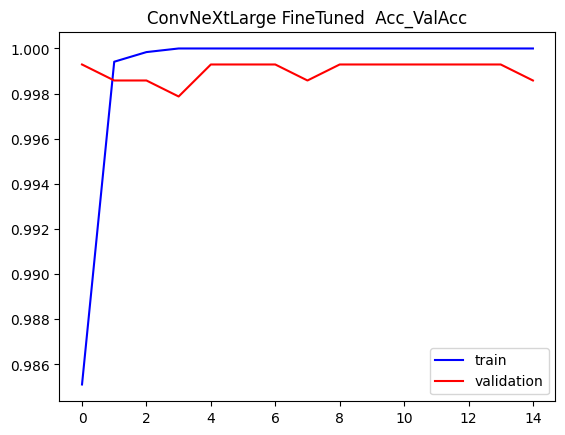

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.title("ConvNeXtLarge FineTuned  Acc_ValAcc")
plt.savefig('accuracy_history.png')
plt.show()

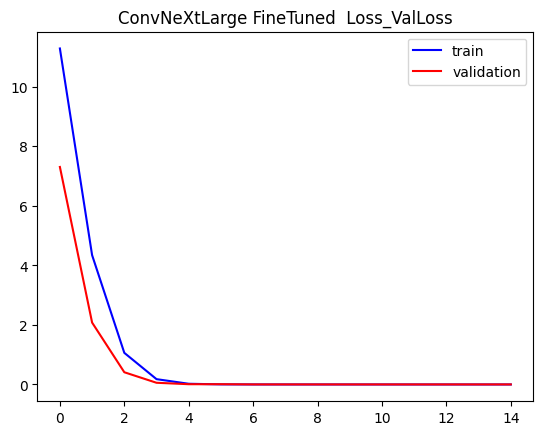

In [10]:
plt.plot(history.history["loss"],color='blue',label='train')
plt.plot(history.history["val_loss"],color='red',label='validation')
plt.legend()
plt.title("ConvNeXtLarge FineTuned  Loss_ValLoss")
plt.savefig('loss_history.png')
plt.show()

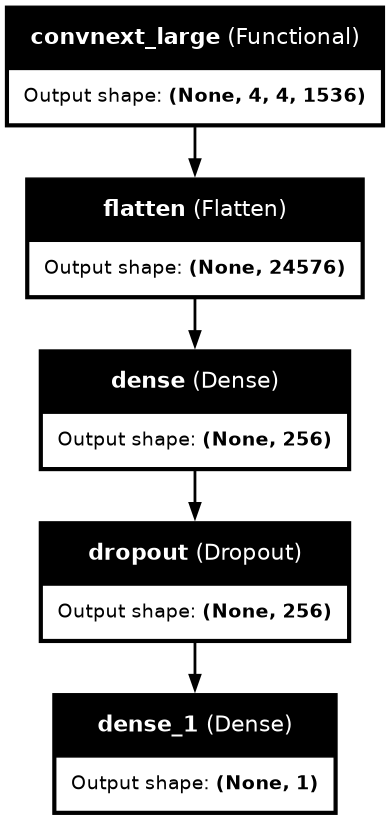

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=False, dpi=100, to_file='model1.png')

In [13]:
import cv2

In [14]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG")

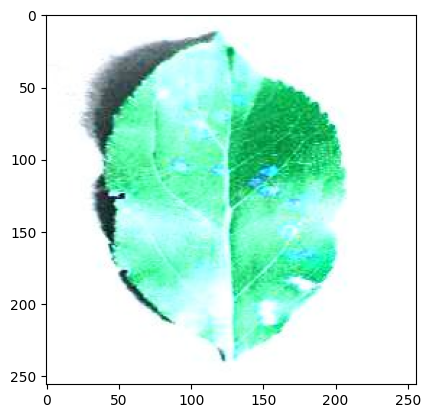

In [15]:
plt.imshow(test_img)

In [16]:
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)

In [17]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


W0000 00:00:1712675176.759475      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675176.759984      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675176.760489      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675176.761617      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675176.762047      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675176.762475      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675176.763202      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675176.763630      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


array([[4.6937887e-05]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.99988115]], dtype=float32)

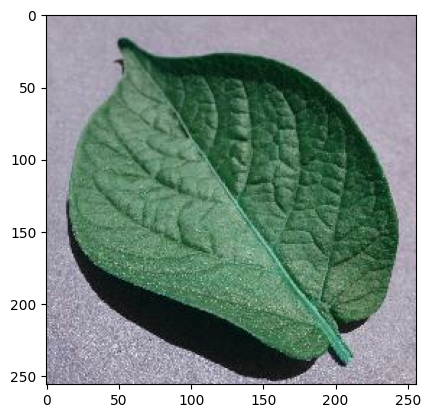

In [18]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/PotatoHealthy1.JPG")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.00052782]], dtype=float32)

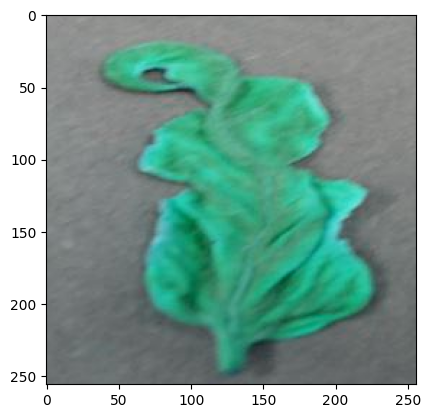

In [19]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus5.JPG")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.00031504]], dtype=float32)

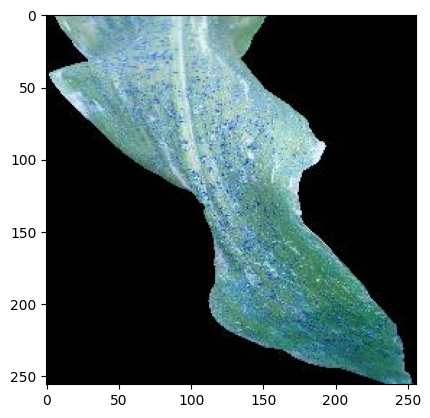

In [20]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/CornCommonRust3.JPG")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[1.3491001e-05]], dtype=float32)

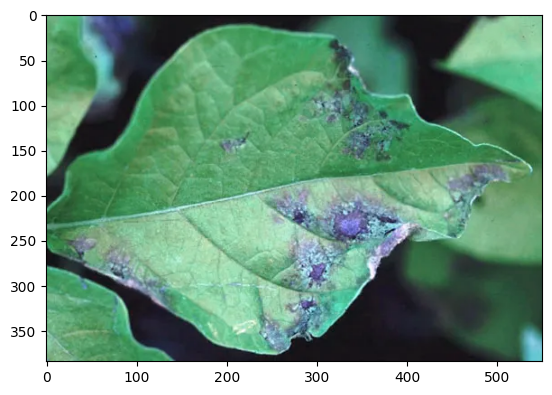

In [21]:
test_img=cv2.imread("/kaggle/input/himanshu1/Defected5.webp")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convnext_large (Functional)     │ (None, 4, 4, 1536)     │   196,230,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 24576)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,291,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 405,044,612 (1.51 GB)

 Trainable params: 202,522,305 (772.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 202,522,307 (772.56 MB)

In [23]:
import cv2
from matplotlib import pyplot as plt
def imgch(img):
    lab_img=cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
    l,a,b=cv2.split(lab_img)
    equ=cv2.equalizeHist(l)
    updated_lab_img =cv2.merge((equ,a,b))
    return cv2.cvtColor(updated_lab_img,cv2.COLOR_LAB2BGR)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[4.8001606e-05]], dtype=float32)

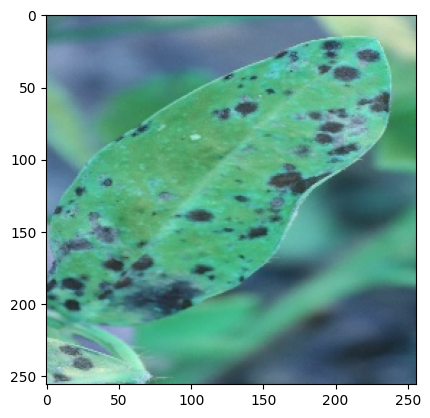

In [24]:
test_img=cv2.imread("/kaggle/input/groundnuttest/New folder/Defected/25.jpg")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[1.6999375e-05]], dtype=float32)

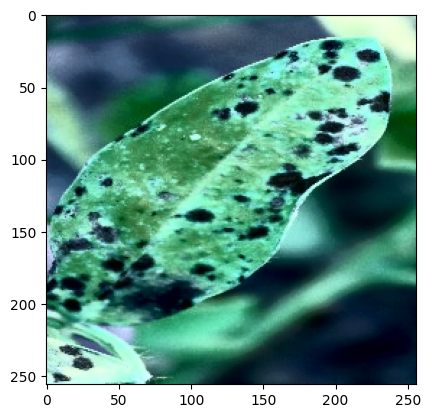

In [25]:
test_img=cv2.imread("/kaggle/input/groundnuttest/New folder/Defected/25.jpg")
test_img=imgch(test_img)
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

In [26]:
import os
path="/kaggle/input/groundnuttest/New folder/"
im_size=150
images=[]
labels=[]
leaf_types=os.listdir('/kaggle/input/groundnuttest/New folder/')
leaf_types

['Healthy', 'Defected']

In [27]:
for i in leaf_types:
  data_path=path+str(i)
  filenames=[i for i in os.listdir(data_path)]
  print(len(filenames))
  #print(filenames)
  for f in filenames:
    img=cv2.imread(data_path+'/'+f)
    img=imgch(img)
    img=cv2.resize(img,(im_size,im_size))
    images.append(img)
    labels.append(i)

409
3116


In [28]:
import numpy as np
images=np.array(images)
#images=images.astype("float32")/255
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y=labels
l=LabelEncoder()
l.fit(["Defected","Healthy"])
list(l.classes_)
y=l.transform(y)

In [29]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [30]:
y_pr=model.predict(images)

  1/111 ━━━━━━━━━━━━━━━━━━━━ 11:47 6s/step

W0000 00:00:1712675219.612892      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675219.613201      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675219.613652      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675219.614030      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675219.614353      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675219.614685      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675219.615047      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675219.615416      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


111/111 ━━━━━━━━━━━━━━━━━━━━ 46s 358ms/step


W0000 00:00:1712675258.960623      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675258.960981      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675258.961435      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675258.963662      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675258.964042      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675258.964397      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675258.964763      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712675258.965121      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [31]:
y_p=(y_pr>0.25)

In [32]:
import pandas as pd

In [33]:
y_p=pd.DataFrame(y_p)

In [34]:
y_predict=np.where(y_p[0]==True,1,0)

test accuracy: 85.7305 %




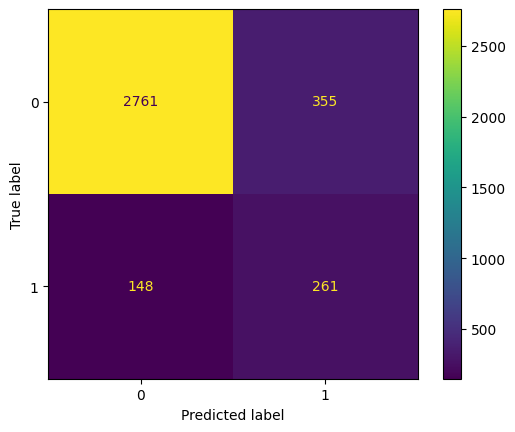

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3116
           1       0.42      0.64      0.51       409

    accuracy                           0.86      3525
   macro avg       0.69      0.76      0.71      3525
weighted avg       0.89      0.86      0.87      3525



In [35]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
test_accu = np.sum(y == y_predict) / len(y) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")
cm=confusion_matrix(y, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y, y_predict))

58
549
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step
test accuracy: 71.4992 %




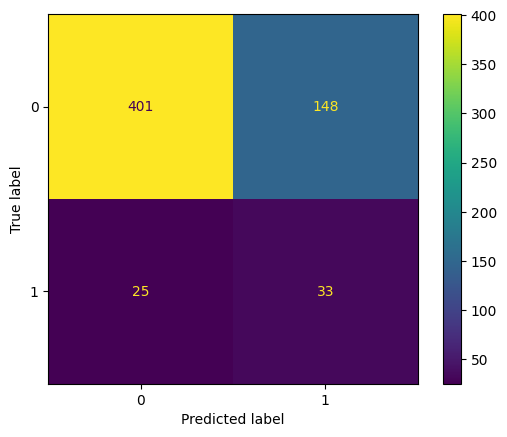

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       549
           1       0.18      0.57      0.28        58

    accuracy                           0.71       607
   macro avg       0.56      0.65      0.55       607
weighted avg       0.87      0.71      0.77       607



In [40]:
import os
path="/kaggle/input/cirtustesting/New folder/"
im_size=150
images=[]
labels=[]
leaf_types=os.listdir('/kaggle/input/cirtustesting/New folder/')
leaf_types
for i in leaf_types:
  data_path=path+str(i)
  filenames=[i for i in os.listdir(data_path)]
  print(len(filenames))
  #print(filenames)
  for f in filenames:
    img=cv2.imread(data_path+'/'+f)
    img=imgch(img)
    img=cv2.resize(img,(im_size,im_size))
    images.append(img)
    labels.append(i)
import numpy as np
images=np.array(images)
#images=images.astype("float32")/255
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y=labels
l=LabelEncoder()
l.fit(["Defected","Healthy"])
list(l.classes_)
y=l.transform(y)
y_pr=model.predict(images)
y_p=(y_pr>0.3)
y_p=pd.DataFrame(y_p)
y_predict=np.where(y_p[0]==True,1,0)
test_accu = np.sum(y == y_predict) / len(y) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")
cm=confusion_matrix(y, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y, y_predict))

In [41]:
model.evaluate(valid)

45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 333ms/step - accuracy: 0.9989 - loss: 0.0022


[0.0024594536516815424, 0.99858158826828]